<a href="https://colab.research.google.com/github/jaden-2/Assignment/blob/master/housing_price_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
import pandas as pd
import numpy as np

from sklearn import (
    linear_model, svm, neighbors, tree, ensemble
    , model_selection, metrics, preprocessing
)

import matplotlib.pyplot as plt
import seaborn as sns

In [224]:
def validate(x_train, y_train, model, param):


  gridSearch = model_selection.GridSearchCV(model, param, cv=5, scoring=['neg_mean_squared_error'], refit='neg_mean_squared_error')
  gridSearch.fit(x_train, y_train)

  return gridSearch.best_params_




### Problem 1

In [225]:
houseInfo = pd.read_csv("/content/train.csv")
features = ["GrLivArea", "YearBuilt"]
target = ["SalePrice"]


houseInfo.drop([x for x in houseInfo.keys() if x not in features + target], axis=1, inplace=True)

print( "Shape: ", houseInfo.shape, "\n")

houseInfo.isnull().sum()

Shape:  (1460, 3) 



YearBuilt    0
GrLivArea    0
SalePrice    0
dtype: int64

### Problem 2

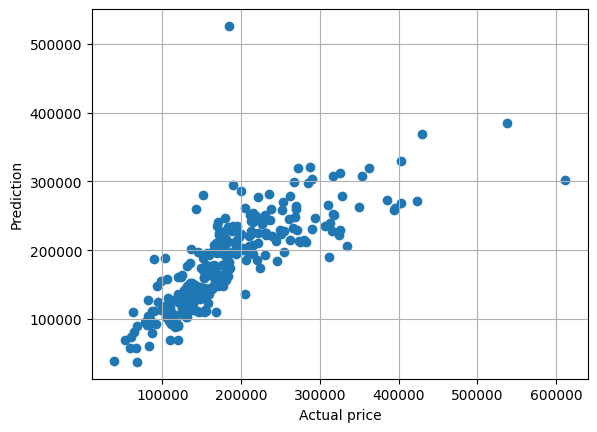

In [226]:
#train test split

x_train, x_test, y_train, y_test = model_selection.train_test_split(houseInfo[features], houseInfo[target], test_size=0.2, random_state=12)

scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

y_train, y_test = np.ravel(y_train), np.ravel(y_test)

model = linear_model.LinearRegression().fit(x_train, y_train)

pred = model.predict(x_test)


plt.scatter(y_test, pred)
plt.xlabel("Actual price")
plt.ylabel("Prediction")
plt.grid(True)

### Problem 3

#### Comparison of methods

In [227]:
param = {
    "kernel": ["inear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"],
    "C": [1, 2, 3, 5]

}

support = svm.SVR()

validate(x_train, y_train, support, param)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_para

{'C': 5, 'gamma': 'auto', 'kernel': 'poly'}

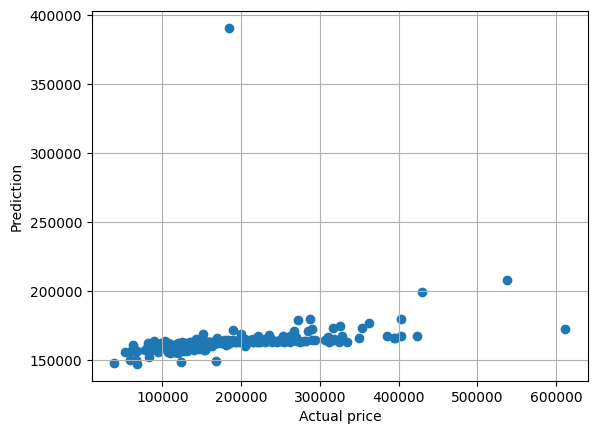

In [228]:
# Support vector
svr = svm.SVR(C=5, kernel="poly", gamma="auto").fit(x_train, y_train)

pred = svr.predict(x_test)


plt.scatter(y_test, pred)
plt.xlabel("Actual price")
plt.ylabel("Prediction")
plt.grid(True)

In [229]:
param = {
    "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    "splitter": ["best", "random"],
    "max_depth": [1, 10, 20]
}

dt = tree.DecisionTreeRegressor()

validate(x_train, y_train, dt, param)

{'criterion': 'poisson', 'max_depth': 10, 'splitter': 'random'}

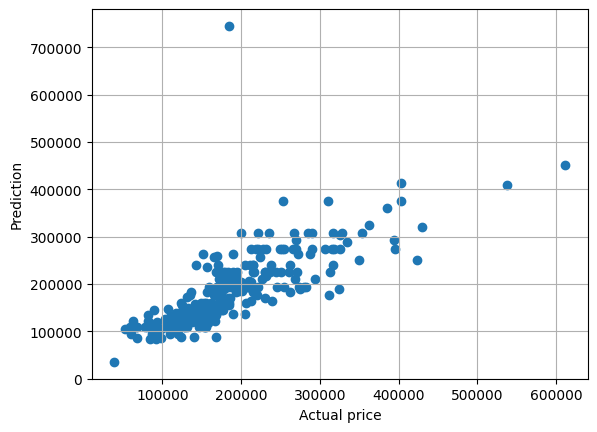

In [230]:
decision = tree.DecisionTreeRegressor(criterion="squared_error", max_depth=10, splitter="random").fit(x_train, y_train)

pred = decision.predict(x_test)


plt.scatter(y_test, pred)
plt.xlabel("Actual price")
plt.ylabel("Prediction")
plt.grid(True)

In [231]:
houseInfo.head()

,YearBuilt,GrLivArea,SalePrice
0,2003,1710,208500
1,1976,1262,181500
2,2001,1786,223500
3,1915,1717,140000
4,2000,2198,250000


In [232]:
param = {
    "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    "n_estimators": [10, 50, 100, 150],
    "max_depth": [1, 10, 20]
}

rf = ensemble.RandomForestRegressor()

validate(x_train, y_train, rf, param)

{'criterion': 'absolute_error', 'max_depth': 10, 'n_estimators': 150}

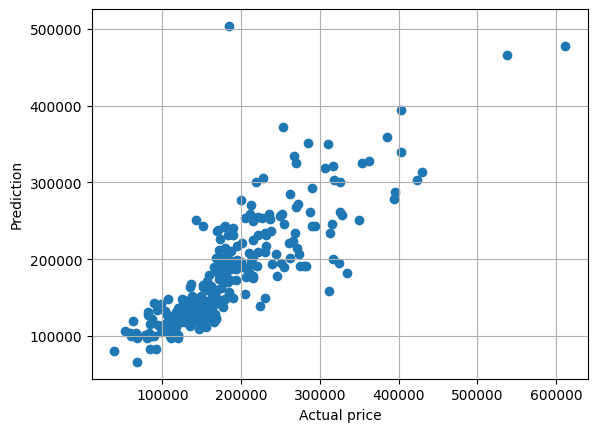

In [233]:
forest = ensemble.RandomForestRegressor(criterion="absolute_error", n_estimators=10, max_depth=10).fit(x_train, y_train)

pred = forest.predict(x_test)

plt.scatter(y_test, pred)
plt.xlabel("Actual price")
plt.ylabel("Prediction")
plt.grid(True)

In [234]:
# Comparing the Mean square error of each model
performance = {
    "Linear regression": [],
    "Support vector": [],
    "Decision tree": [],
    "Random forest": []
}

models = [model, svr, decision, forest]

for i, key in enumerate(performance.keys()):
    predict = models[i].predict(x_test)
    score = metrics.mean_absolute_error(y_test, predict)

    performance[key].append(score)

for i, key in enumerate(performance.keys()):
    predict = models[i].predict(x_test)
    score = metrics.mean_absolute_error(y_test, predict)

    performance[key].append(np.sqrt(score))


# Sort models in ascending order by the order of performance
d = pd.DataFrame(performance, index=["MSE", "RMSE"])
d = d.sort_values("MSE", axis=1)

### Problem 4

In [235]:
data = pd.read_csv("/content/train.csv")

data.dropna(axis=1, how="all", inplace=True)

# determining features with the best linear relationship with sale price
matrix = data.corr(numeric_only=True)
best_features = abs(matrix["SalePrice"])[matrix["SalePrice"] >0.6]
best_features = list(best_features.keys())

# dropping features

data.drop([x for x in data.keys() if x not in best_features], axis=1, inplace=True)
#remove sale price from best features as it the target
best_features.pop()


data.head()


,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,7,856,856,1710,2,548,208500
1,6,1262,1262,1262,2,460,181500
2,7,920,920,1786,2,608,223500
3,7,756,961,1717,3,642,140000
4,8,1145,1145,2198,3,836,250000


In [236]:
from scipy import stats

stats.skew(data)

array([ 0.21672098,  1.52268809,  1.37534174,  1.36515595, -0.3421969 ,
        0.17979594,  1.88094075])

In [237]:
# creating train, test data


x_train, x_test, y_train, y_test = model_selection.train_test_split(data[best_features], data[target], test_size=0.2, random_state=123)

y_train, y_test = np.ravel(y_train), np.ravel(y_test)

# standardise independent variables

sc = preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



#### Linear regression

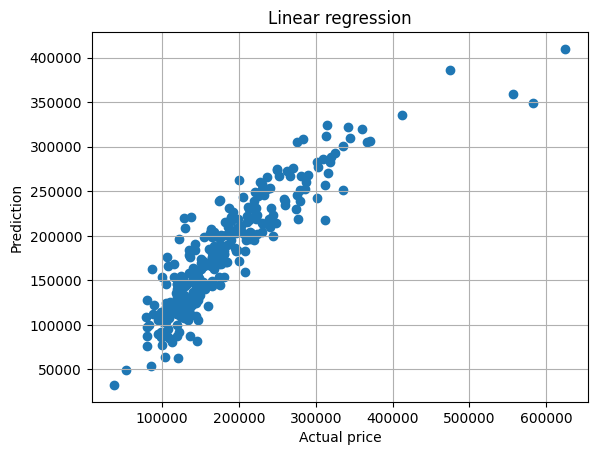

In [238]:
# Initialize model and train using Linear regression

linear_regr = linear_model.LinearRegression().fit(x_train, y_train)

prediction = linear_regr.predict(x_test)

plt.title("Linear regression")
plt.scatter(y_test, prediction)
plt.xlabel("Actual price")
plt.ylabel("Prediction")
plt.grid(True)

#### Support vector regression

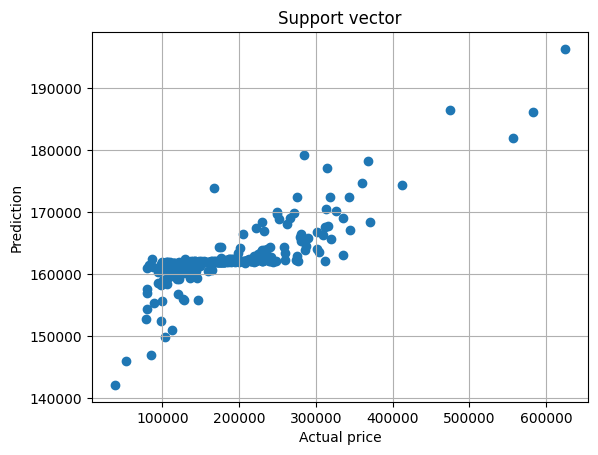

In [239]:

support_vect = svm.SVR(C=5, kernel="poly", gamma="auto").fit(x_train, y_train)

prediction = support_vect.predict(x_test)

plt.title("Support vector")
plt.scatter(y_test, prediction)
plt.xlabel("Actual price")
plt.ylabel("Prediction")
plt.grid(True)

#### Decision Tree

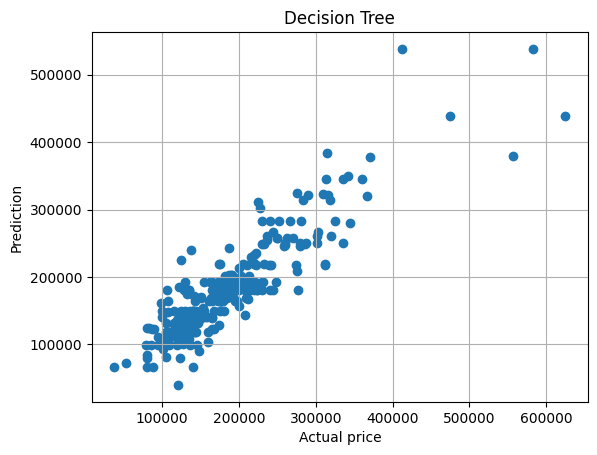

In [240]:
decision_tree = tree.DecisionTreeRegressor(criterion="squared_error", max_depth=10, splitter="random").fit(x_train, y_train)

prediction = decision_tree.predict(x_test)

plt.title("Decision Tree")
plt.scatter(y_test, prediction)
plt.xlabel("Actual price")
plt.ylabel("Prediction")
plt.grid(True)

#### Random forest

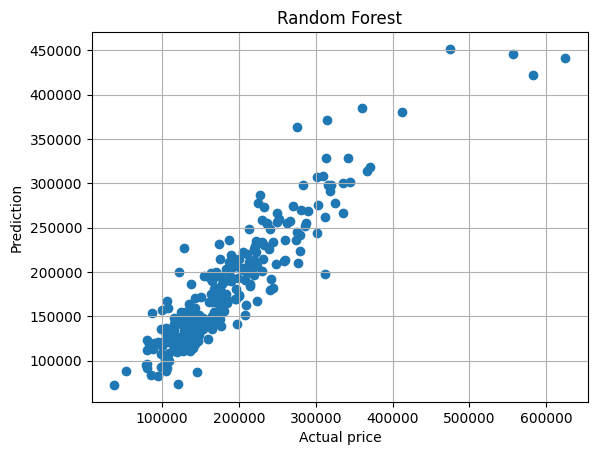

In [241]:
random_forest = ensemble.RandomForestRegressor(criterion="absolute_error", n_estimators=10, max_depth=10).fit(x_train, y_train)

prediction = random_forest.predict(x_test)

plt.title("Random Forest")
plt.scatter(y_test, prediction)
plt.xlabel("Actual price")
plt.ylabel("Prediction")
plt.grid(True)

#### Comparing perfomance by mean square error

In [245]:
# Comparing the Mean square error of each model
performance2 = {
    "Linear regression": [],
    "Support vector": [],
    "Decision tree": [],
    "Random forest": []
}

models = [linear_regr, support_vect, decision_tree, random_forest]

for i, key in enumerate(performance.keys()):
    predict = models[i].predict(x_test)
    score = metrics.mean_absolute_error(y_test, predict)

    performance2[key].append(score)

for i, key in enumerate(performance2.keys()):
    predict = models[i].predict(x_test)
    score = metrics.mean_absolute_error(y_test, predict)

    performance2[key].append(np.sqrt(score))


# Sort models in ascending order by the order of performance
da = pd.DataFrame(performance2, index=["MSE", "RMSE"])
da = da.sort_values("MSE", axis=1)
da

,Random forest,Linear regression,Decision tree,Support vector
MSE,21211.676541,23934.820777,24036.363503,52422.198754
RMSE,145.642290,154.708826,155.036652,228.958946


In [244]:
d

,Random forest,Decision tree,Linear regression,Support vector
MSE,29009.789384,31005.072782,31528.613550,54327.208638
RMSE,170.322604,176.082574,177.562985,233.081978




---


#### For this analysis I performed determined the correlation of the dataset to determine the features with the strongest relationship with my target variable. By doing this, I was able to isolate features with over 60% correlation with the sale price.


#### Using the features I trained my models and observed a significant increase in performance of the following models: linear regression, decision tree, and random forest. The support vector model performed poorly when more features were used.
